[230.04916363   1.53760557]
[226.70003614   2.43308931]


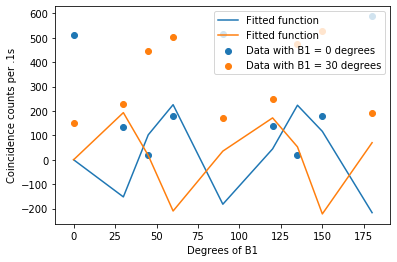

In [18]:
import numpy as np
from scipy.optimize import curve_fit 
from scipy import optimize
from scipy import linalg
import matplotlib.pyplot as plt


#zerostate = np.array([1,0], [0,0])
#onestate = np.array([0,0],[1,0])


#Errorprop
#ds/dn(-45,-22.5)
#n1 = ((650+620-137-170)+11-111(650+620+151+170)/((650+620+151+170)^2)
#ds/dn(-45,67.5)
#n2 = ((650+620+151-170)*11 + (650+620+171+150))/(650+120+151+170)^2



T1B = np.array([0, 30, 45, 60, 90, 120, 135, 150, 180])
T1C = np.array([510, 133, 21, 180,515, 139, 21, 180, 588])

T2B = np.array([0, 30, 45, 60, 90, 120, 135, 150, 180])
T2C  = np.array([151, 228, 447 , 503, 172, 249, 474, 527, 190])

T3B = np.array([0, 30, 45, 60, 90, 120, 135, 150, 180])
T3C = np.array([29, 519, 639, 445, 22, 196, 632, 442, 28])

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, T2B, T2C,
                                               p0=[2, 2])


def test_func1(x, a, b):
    return a * np.cos(b * x)

params1, params_covariance1 = optimize.curve_fit(test_func1, T1B, T1C,
                                               p0=[2, 2])

print(params1)
print(params)
plt.xlabel('Degrees of B1')
plt.ylabel('Coincidence counts per .1s')
plt.scatter(T1B, T1C, label="Data with B1 = 0 degrees" )
plt.scatter(T2B, T2C, label="Data with B1 = 30 degrees" )
plt.plot(T2B, test_func(T2B, params[0], params[1]),
         label='Fitted function')
plt.plot(T1B, test_func(T1B, params1[0], params1[1]),
         label='Fitted function')
plt.legend(loc = 'best')
plt.show() 

